# This notebook is for eda

### It encompasses normality tests and summary statistics for different features, together with visualisations

In [2]:
from mpl_toolkits.mplot3d import Axes3D
import pandas as pd
import os
from scipy import stats
import plotly.express as px
import plotly
import numpy as np
import seaborn as sns
from scipy.stats import norm, anderson
import matplotlib.pyplot as plt
from statsmodels.graphics.gofplots import qqplot
sns.set()
# ------------GLOBALS-------------
alpha = 0.05
PROC_DATA_PATH = '~/library/data/processed/'
qualif_features = ['NVQ4_rate', 'youth_unemployment_rate', 'no_qualif_rate',
                   'NVQ3_rate', 'NVQ2_rate', 'NVQ1_rate', 'group_qualif']
econ_features = ['3_year_survival_rate', 'job_density',
                 '3_year_survival_number', 'number_of_jobs',
                 'youth_unemployment_rate', 'group_econ']


# ------------FUNCTIONS-----------
def normality_tests(df):
    shap_arr = []
    k2_arr = []
    andr_arr = []
    for col in range(len(df.columns)):

        stat, p = stats.shapiro(df[df.columns[col]])

        if p <= alpha:
            shap_arr.append((df.columns[col], stat, p))

        stat, p = stats.normaltest(df[df.columns[col]])

        if p <= alpha:
            k2_arr.append((df.columns[col], stat, p))

        result = anderson(df[df.columns[col]])
        for i in range(len(result.critical_values)):
            sl, cv = result.significance_level[i], result.critical_values[i]
            if result.statistic >= result.critical_values[i]:
                andr_arr.append((df.columns[col], sl, cv))

    if len(shap_arr) != 0:
        print("List of features that did not pass the Shapiro test is",
              end='\n')
        print("{:30s}{:13s}{:11s}".format("Feature name", "W-statistic",
                                          "p-value"), end='\n')
        [print("{:30s} {:4f} {:10f}".format(col, x, y)) for col, x, y in
         [elem for elem in shap_arr]]
    print()
    if len(k2_arr) != 0:
        print(
            "List of features that did not pass the k\N{SUPERSCRIPT TWO} test is",
            end='\n')
        print("{:30s}{:15s}{:11s}".format("Feature name", "test statistic",
                                          "p-value"), end='\n')
        [print("{:30s} {:10f} {:10f}".format(col, x, y)) for col, x, y in
         [elem for elem in k2_arr]]
    print()
    if len(andr_arr) != 0:
        print("List of features that did not pass the Anderson test is",
              end='\n')
        print("{:26s}{:20s}{:18s}".format("Feature name", "significance level",
                                          "critical values"), end='\n')
        [print("{:30s} {:10f} {:15f}".format(col, x, y)) for col, x, y in
         [elem for elem in andr_arr]]
    print()


In [3]:
df = pd.read_csv(PROC_DATA_PATH + 'youth_data_labelled.csv', sep=',', index_col=0)

In [4]:
# this df holds only qualification data
df_0 = df[qualif_features]

In [5]:
# this df holds only economic data
df_1 = df[econ_features]

In [6]:
df

,area,year,3_year_survival_number,3_year_survival_rate,number_of_jobs,job_density,unemployment_rate,NVQ4_rate,youth_unemployment_rate,no_qualif_rate,NVQ3_rate,NVQ2_rate,NVQ1_rate,group_qualif,group_econ
0,Barking and Dagenham,2011,455.0,54.5,54000,0.45,13.0,33.2,22.734367,8.6,13.7,16.3,14.3,2,0
1,Barnet,2011,1635.0,57.7,147000,0.62,8.0,57.3,9.944418,3.7,10.9,9.3,7.5,0,1
2,Bexley,2011,555.0,58.7,78000,0.53,8.0,29.6,10.870386,4.8,19.0,19.2,17.2,1,0
3,Brent,2011,1085.0,56.7,115000,0.53,10.8,33.8,14.681718,8.2,14.8,11.4,9.2,2,0
4,Bromley,2011,990.0,62.7,119000,0.61,6.9,47.1,10.269752,5.4,17.5,12.8,10.5,0,1
5,Camden,2011,1835.0,57.3,331000,2.06,8.8,69.4,13.865943,4.0,8.2,7.2,5.2,3,0
6,Croydon,2011,1055.0,60.1,136000,0.56,10.8,43.1,16.016635,6.2,12.0,16.5,12.0,2,0
7,Ealing,2011,1270.0,57.5,148000,0.63,10.0,54.7,12.986582,5.9,13.8,7.4,6.8,0,0
8,Enfield,2011,865.0,56.5,110000,0.54,12.0,44.0,19.496204,5.4,13.0,12.5,12.5,2,0
9,Greenwich,2011,690.0,56.8,81000,0.47,10.8,49.2,17.029480,6.6,14.0,10.7,9.0,2,0


In [7]:
normality_tests(df_1)

List of features that did not pass the Shapiro test is
Feature name                  W-statistic  p-value    
3_year_survival_rate           0.964149   0.001825
job_density                    0.553262   0.000000
3_year_survival_number         0.795482   0.000000
number_of_jobs                 0.610680   0.000000
youth_unemployment_rate        0.945228   0.000057
group_econ                     0.702237   0.000000

List of features that did not pass the k² test is
Feature name                  test statistic p-value    
3_year_survival_rate            22.490111   0.000013
job_density                    123.116328   0.000000
3_year_survival_number          78.393708   0.000000
number_of_jobs                 114.946483   0.000000
youth_unemployment_rate          9.721777   0.007744
group_econ                       9.377673   0.009197

List of features that did not pass the Anderson test is
Feature name              significance level  critical values   
job_density                     15.0

The lists for K$^2$ and Shapiro tests are identical; this means that none of the data that we have is normally distributed. 

A note on the p-values which seem to be null (i.e. 0.000000): they are not. The values have been formatted to support up to 6 digits after floating point, and 0.000000 just means that the p-value is less than c * 10$^-$$^6$, where c is some digit

In [8]:
normality_tests(df_0)

List of features that did not pass the Shapiro test is
Feature name                  W-statistic  p-value    
NVQ4_rate                      0.973384   0.012637
youth_unemployment_rate        0.945228   0.000057
NVQ2_rate                      0.932421   0.000007
NVQ1_rate                      0.937395   0.000016
group_qualif                   0.782038   0.000000

List of features that did not pass the k² test is
Feature name                  test statistic p-value    
youth_unemployment_rate          9.721777   0.007744
NVQ2_rate                       17.626033   0.000149
NVQ1_rate                       14.524194   0.000702

List of features that did not pass the Anderson test is
Feature name              significance level  critical values   
NVQ4_rate                       15.000000        0.559000
NVQ4_rate                       10.000000        0.637000
NVQ4_rate                        5.000000        0.764000
youth_unemployment_rate         15.000000        0.559000
youth_unemploy

NVQ3 rates seem to be normally distributed. Will need to investigate further the distribution of no qualif rates and NVQ4 

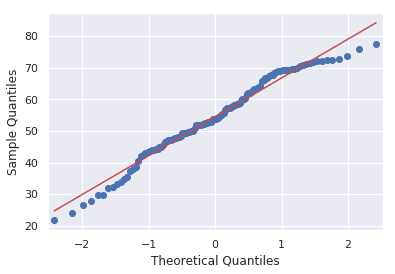

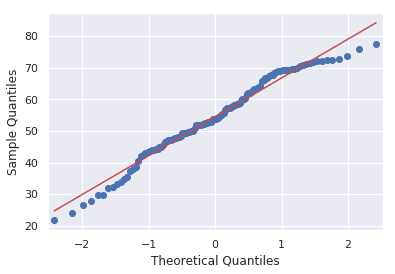

In [9]:
qqplot(df_0['NVQ4_rate'], line='s')

Indeed with the exception of a few outliers most of the data fall about a straight line. Considering NVQ4 to be normally distributed seems like a fairly safe assumption

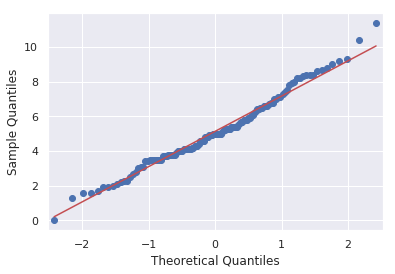

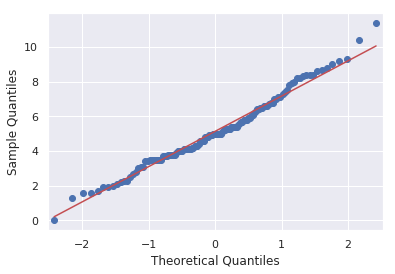

In [10]:
qqplot(df_0['no_qualif_rate'], line='s')

/home/nbuser/anaconda3_501/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning:

Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.



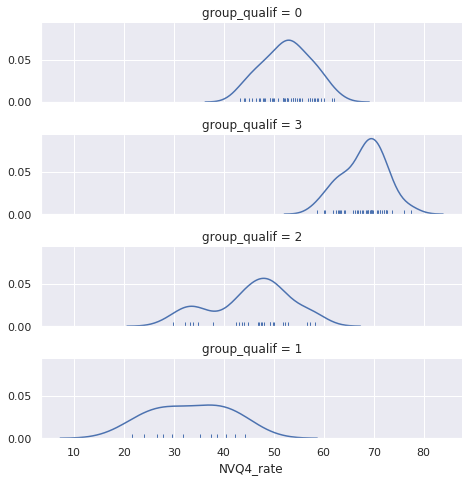

In [11]:
ordered_ = df_0.group_qualif.value_counts().index
g = sns.FacetGrid(df_0, row="group_qualif", row_order=ordered_,
                  height=1.7, aspect=4,)
g.map(sns.distplot, "NVQ4_rate", hist=False, rug=True);

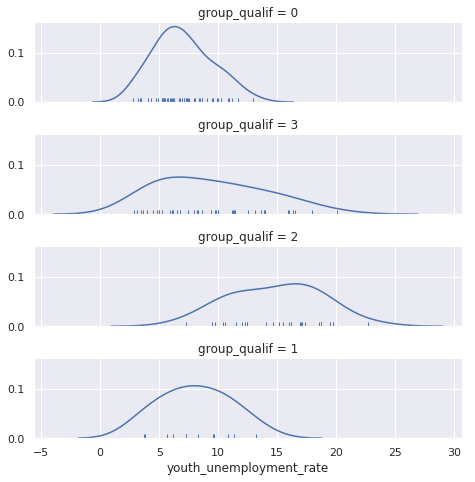

In [12]:
ordered_ = df_0.group_qualif.value_counts().index
g = sns.FacetGrid(df_0, row="group_qualif", row_order=ordered_,
                  height=1.7, aspect=4,)
g.map(sns.distplot, "youth_unemployment_rate", hist=False, rug=True);

Distribution of data

Same case with no qualifications rate. The data plotted falls very tightly on the 45 degree angle line

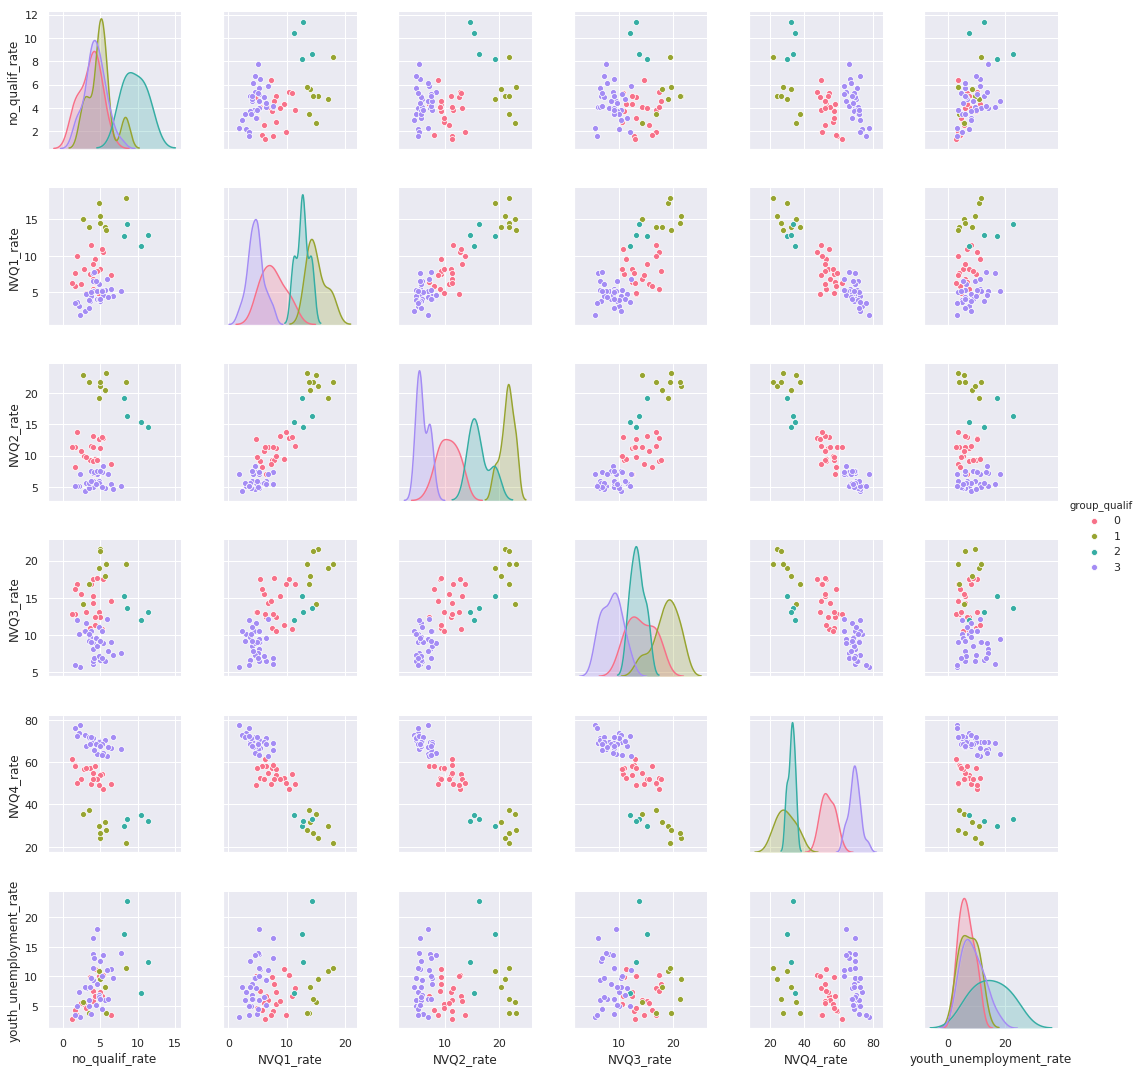

In [38]:
# check how kmeans split the data into clusters
fig = sns.pairplot(df_0, diag_kind='kde', hue='group_qualif',
                   palette="husl", diag_kws=dict(shade=True),
                   x_vars=['no_qualif_rate','NVQ1_rate' , 'NVQ2_rate' ,'NVQ3_rate', 'NVQ4_rate', 'youth_unemployment_rate'],
                   y_vars=['no_qualif_rate','NVQ1_rate' , 'NVQ2_rate' ,'NVQ3_rate', 'NVQ4_rate','youth_unemployment_rate'])

In [13]:
df_0.groupby(['group_qualif']).agg(['mean', 'std', 'min', 'max']).T

group_qualif                          0          1          2          3
NVQ4_rate               mean  52.641667  33.333333  45.538462  68.038095
                        std    4.781695   7.452435   7.883303   4.304108
                        min   43.300000  21.700000  29.800000  58.600000
                        max   62.100000  44.300000  58.200000  77.400000
youth_unemployment_rate mean   7.029022   8.075063  14.859754   9.469774
                        std    2.436518   2.979325   3.821144   4.536211
                        min    2.771333   3.753999   7.251567   2.865119
                        max   12.986582  13.190116  22.734367  20.111833
no_qualif_rate          mean   4.531250   4.641667   7.746154   4.354762
                        std    1.553055   1.518048   1.584482   1.602468
                        min    1.300000   2.700000   5.000000   0.000000
                        max    7.300000   8.400000  11.400000   7.800000
NVQ3_rate               mean  14.097917  18.108333  12.592308   9.157143
                        std    2.185298   2.231371   2.376034   1.890302
                        min    8.600000  14.200000   7.200000   5.700000
                        max   18.900000  21.500000  17.800000  13.100000
NVQ2_rate               mean  10.810417  19.658333  12.707692   6.588095
                        std    1.925334   2.998017   2.581770   1.538641
                        min    6.800000  14.100000   8.200000   4.300000
                        max   14.200000  23.100000  19.200000  10.900000
NVQ1_rate               mean   7.731250  13.800000   8.826923   4.800000
                        std    2.097329   2.571876   3.031245   1.370419
                        min    3.500000   8.900000   4.000000   1.800000
                        max   12.600000  18.000000  14.300000   7.700000

Group 0: lowest unemployment rate, 
Group 1: lowest NVQ4 rate, 2nd lowest youth unemployment rate, highest NVQ3_rate, NVQ2, NVQ1
Group 2: Highest unemployment rate, highest no qualif
Group 3: Highest NVQ4, lowest no_qualif, 3rd lowest youth unemployment rate, lowest NVQ3, NVQ2, NVQ1

In [14]:
df.iloc[df_0.index[df_0['no_qualif_rate'] == 0]]

,area,year,3_year_survival_number,3_year_survival_rate,number_of_jobs,job_density,unemployment_rate,NVQ4_rate,youth_unemployment_rate,no_qualif_rate,NVQ3_rate,NVQ2_rate,NVQ1_rate,group_qualif,group_econ
121,Richmond upon Thames,2014,1270.0,64.0,95000,0.76,4.5,72.5,2.865119,0.0,12.0,6.9,3.0,3,1


In [15]:
df.groupby('group_qualif')['area'].value_counts()

group_qualif  area                  
0             Barnet                    4
              Bromley                   4
              Harrow                    4
              Kingston upon Thames      4
              Merton                    4
              Ealing                    3
              Brent                     2
              Croydon                   2
              Enfield                   2
              Greenwich                 2
              Hillingdon                2
              Hounslow                  2
              Lewisham                  2
              Redbridge                 2
              Sutton                    2
              Tower Hamlets             2
              Hackney                   1
              Haringey                  1
              Newham                    1
              Richmond upon Thames      1
              Waltham Forest            1
1             Bexley                    4
              Havering                 

In [16]:
group = df['group_qualif'].unique().tolist()
arr = []
boroughs = []
for group in df['group_qualif'].unique().tolist():
    arr.append(df[df['group_qualif'] == group]['area'].mode())

for item in arr:
    for i in item:
        boroughs.append(i)

x = df[df['area'].isin(boroughs)]

In [17]:
df_0 = x[qualif_features]
df_0.groupby(['group_qualif']).agg(['mean', 'std', 'min', 'max']).T

group_qualif                          0          1          2          3
NVQ4_rate               mean  53.930000  29.300000  32.525000  69.312500
                        std    3.849279   5.382511   2.090255   3.348351
                        min   47.100000  21.700000  29.800000  63.100000
                        max   61.600000  37.400000  34.800000  77.400000
youth_unemployment_rate mean   6.601864   7.440446  14.889714   8.821507
                        std    2.489504   3.039341   6.612213   3.872093
                        min    2.771333   3.753999   7.251567   3.092845
                        max   11.218130  11.388736  22.734367  17.959095
no_qualif_rate          mean   3.740000   5.100000   9.650000   4.396875
                        std    1.410636   1.692842   1.508863   1.415464
                        min    1.300000   2.700000   8.200000   1.600000
                        max    6.400000   8.400000  11.400000   7.800000
NVQ3_rate               mean  14.135000  18.737500  13.500000   8.765625
                        std    2.411873   2.398176   1.334166   1.832257
                        min   10.600000  14.200000  12.000000   5.700000
                        max   17.700000  21.500000  15.200000  12.200000
NVQ2_rate               mean  10.670000  21.512500  16.375000   6.021875
                        std    1.829610   1.278881   2.007278   1.079347
                        min    7.100000  19.200000  14.600000   4.300000
                        max   13.700000  23.100000  19.200000   8.300000
NVQ1_rate               mean   7.730000  15.212500  12.800000   4.737500
                        std    1.990001   1.610180   1.227464   1.376707
                        min    4.800000  13.600000  11.300000   1.800000
                        max   11.500000  18.000000  14.300000   7.700000

Group 0: lowest youth unempl, no_qualif
Group 1: lowest NVQ4, 2nd lowest youth unempl, highest NVQ1,2,3
Group 2: highest youth, no qualif rate
Group 3: highest NVQ4, 2nd highest youth unempl, lowest NVQ1,2,3

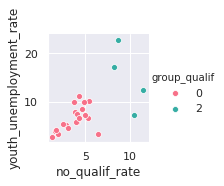

In [56]:
x_vars = ['no_qualif_rate']
y_vars = ['youth_unemployment_rate']

fig = sns.pairplot(x[x['group_qualif'].isin([0,2])][qualif_features], diag_kind='kde', hue='group_qualif',
                   palette="husl", diag_kws=dict(shade=True),
                  x_vars=x_vars, y_vars=y_vars)

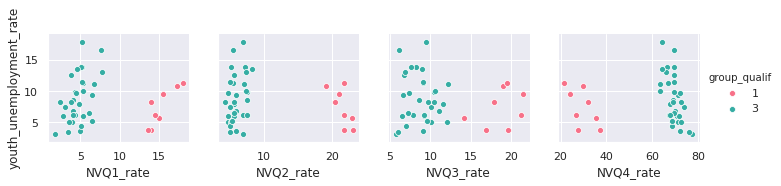

In [57]:
x_vars = ['NVQ1_rate', 'NVQ2_rate', 'NVQ3_rate','NVQ4_rate']
y_vars = ['youth_unemployment_rate']
fig = sns.pairplot(x[x['group_qualif'].isin([1,3])][qualif_features], diag_kind='kde', hue='group_qualif',
                   palette="husl", diag_kws=dict(shade=True),
                  x_vars=x_vars, y_vars=y_vars)

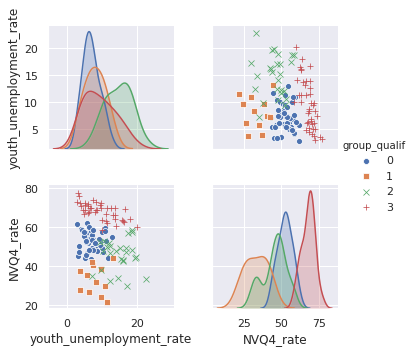

In [18]:
sns.pairplot(df, vars=['youth_unemployment_rate', 'NVQ4_rate'],hue='group_qualif', diag_kind='kde', markers=["o","s","x","+"])

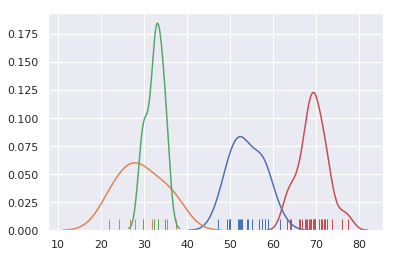

In [19]:
target_0 = x.loc[x['group_qualif'] == 0]
target_1 = x.loc[x['group_qualif'] == 1]
target_2 = x.loc[x['group_qualif'] == 2]
target_3 = x.loc[x['group_qualif'] == 3]

sns.distplot(target_0[['NVQ4_rate']], hist=False, rug=True)
sns.distplot(target_1[['NVQ4_rate']], hist=False, rug=True)
sns.distplot(target_2[['NVQ4_rate']], hist=False, rug=True)
sns.distplot(target_3[['NVQ4_rate']], hist=False, rug=True)

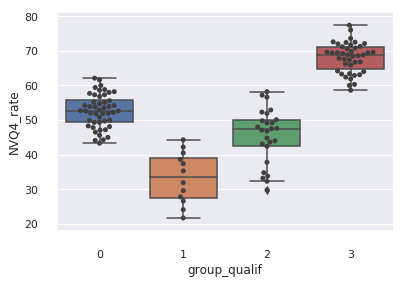

In [20]:
f, ax = plt.subplots()
sns.despine(offset=10, right=True);
sns.boxplot(data=df, y='NVQ4_rate', x='group_qualif')
sns.swarmplot(x="group_qualif", y="NVQ4_rate", data=df, color=".25")

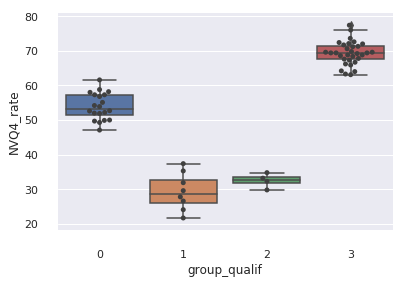

In [21]:
f, ax = plt.subplots()
sns.despine(offset=10, right=True);
sns.boxplot(data=x, y='NVQ4_rate', x='group_qualif')
sns.swarmplot(x="group_qualif", y="NVQ4_rate", data=x, color=".25")

### Every year the rate of youth unemployment in London diminshed by ~2.5 percentiles between 2011 and 2014

In [20]:
df.groupby('year')['youth_unemployment_rate'].describe()

,count,mean,std,min,25%,50%,75%,max
year,,,,,,,,
2011,32.0,13.942957,4.266555,5.739796,10.720227,13.426262,17.525762,22.734367
2012,32.0,11.059617,3.646945,4.798762,8.004415,10.203964,14.000575,17.159529
2013,32.0,7.944732,2.514514,3.981886,5.846268,7.743836,10.007474,12.413395
2014,32.0,5.127005,1.588868,2.771333,3.576057,5.117404,6.340278,7.957366


#### To understand the properties of clusters we can study the unique borough entries in each of the clusters

Since in this case clustering was done on qualifications we will only look at those. Boroughs in cluster 1 have higher on average NVQ1, NVQ2, NVQ3 rates, almost double as much compared to boroughs in cluster 0. The only exceptions are NVQ4 and no qualification rates. An interesting observation is that although more citizens of boroughs in cluster 1 have a basic level of qualifications than their counterparts in cluster 0, the average youth unemployment level is higher in cluster 1, as opposed to cluster 0. Another interesting observation to be made is that the percentage of people belonging to cluster 0 that hold a skillset equivalent to NVQ4, so who are in higher education or have obtained a diploma, is more than 50% higher than in cluster 1. This evidence points towards the fact that competitiveness incentivizes people to go into further education, and that people who hold a higher degree diploma, grossly speaking, are more likely to be employed than those who did not attend university.

boxplot overlapped with swarmplot to visualise distribution of NVQ4 rates in groups 0 and 1. As stated before group 1 has on average

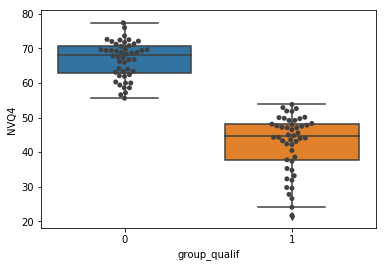

In [29]:
ax = sns.boxplot(x='group_qualif', y='NVQ4', data=box_df)
ax = sns.swarmplot(x="group_qualif", y="NVQ4", data=box_df, color=".25")

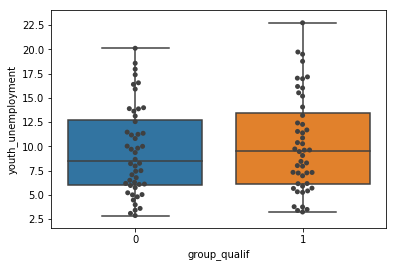

In [30]:
ax = sns.boxplot(y='youth_unemployment', x='group_qualif', data=box_df)
ax = sns.swarmplot(x="group_qualif", y="youth_unemployment", data=box_df, color=".25")

Barking and Dengham, Entfield, Waltham Forest, Greenwich and Croydon have been historically the boroughs with highest youth unemployment rates, being in the bottom the top 90th percentile for youth unemployment. The general trend is that youth unemployment rates fall as NVQ4 rates rise in these boroughs.

In [52]:
df_1.groupby(['group_econ']).agg(['mean', 'std', 'min', 'max']).T

group_econ                                0              1              2
3_year_survival_rate    mean      56.085417      60.657895      53.450000
                        std        3.396869       2.618308       2.004162
                        min       42.100000      55.400000      50.800000
                        max       61.500000      66.700000      55.400000
job_density             mean       0.745625       0.762105       4.315000
                        std        0.426375       0.345081       0.130256
                        min        0.390000       0.430000       4.160000
                        max        2.120000       2.250000       4.450000
3_year_survival_number  mean    1067.083333    1329.276316    3947.500000
                        std      377.890046     502.660060     445.430503
                        min      455.000000     530.000000    3515.000000
                        max     2430.000000    3270.000000    4380.000000
number_of_jobs          mean  134125.000000  132736.842105  706500.000000
                        std    71937.509820   63524.770690   26888.659319
                        min    54000.000000   59000.000000  674000.000000
                        max   344000.000000  379000.000000  737000.000000
youth_unemployment_rate mean      14.178874       6.677526       7.574990
                        std        3.460042       2.224898       3.860844
                        min        7.969365       2.771333       3.420368
                        max       22.734367      11.346710      12.549213

Characteristics: 
    Group 0:lowest survival number, job density, highest unemployment rate
    Group 1: highest survival rate, lowest unemployment rate, 
    Group 2: highest number of jobs, highest job density, lowest business survival rate

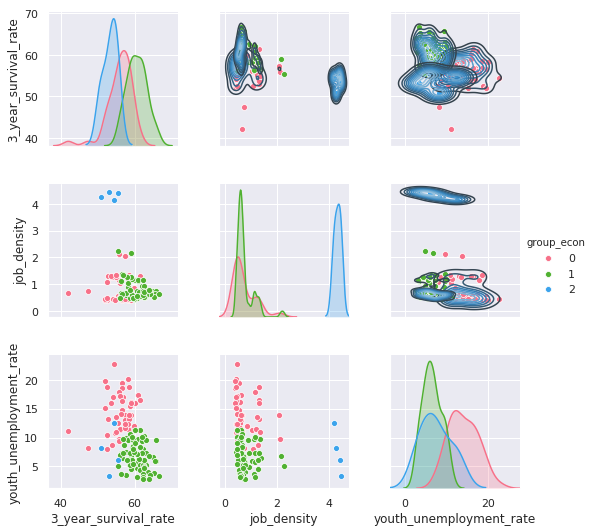

In [41]:
fig = sns.pairplot(df_1, diag_kind='kde', hue='group_econ',
                   palette="husl", diag_kws=dict(shade=True),
                   x_vars=['3_year_survival_rate', 'job_density', 'youth_unemployment_rate'],
                   y_vars=['3_year_survival_rate', 'job_density', 'youth_unemployment_rate'])

fig = fig.map_upper(sns.kdeplot, cmap="Blues_d")

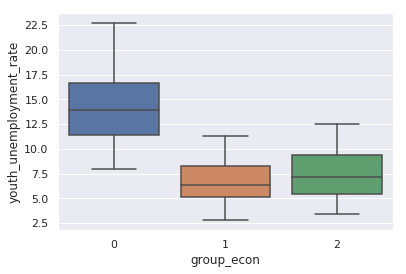

In [36]:
sns.boxplot(y='youth_unemployment_rate', x='group_econ', data=df_1)

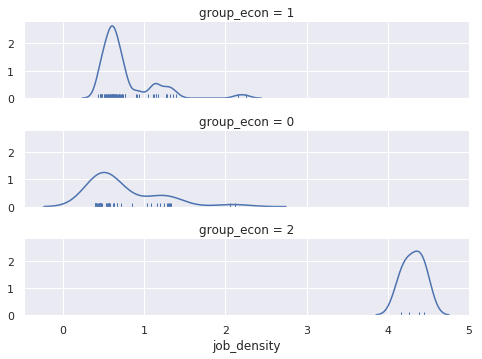

In [25]:
ordered_ = df_1.group_econ.value_counts().index
g = sns.FacetGrid(df_1, row="group_econ", row_order=ordered_,
                  height=1.7, aspect=4,)
g.map(sns.distplot, "job_density", hist=False, rug=True);

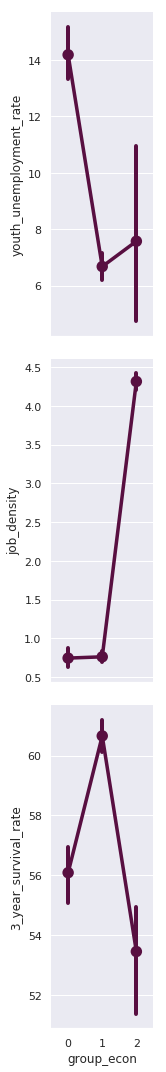

In [35]:
#fig, ax =plt.subplots(1,3)
g = sns.PairGrid(df_1, y_vars=["youth_unemployment_rate",'job_density', '3_year_survival_rate'],
                 x_vars=["group_econ"],
                 height=5, aspect=.5)
g.map(sns.pointplot, scale=1.3, errwidth=4, color="xkcd:plum")
#g.set(ylim=(0, 1))
sns.despine(fig=g.fig, left=True)

In [45]:
fig = px.density_contour(df_1, x="job_density", y="3_year_survival_rate", color="group_econ", marginal_x="rug", marginal_y="histogram")
fig.show()